In [2]:
# USA HOUSING DATASET

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt
%matplotlib inline

In [4]:
#loading the dataset
dt=pd.read_csv('USA_Housing.csv')

In [5]:
#check out the columns 
dt.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
#check for if any null points
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [9]:
#explore the data for small sample
dt.head()
#By default first five samples

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
#refer the outliers
dt.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


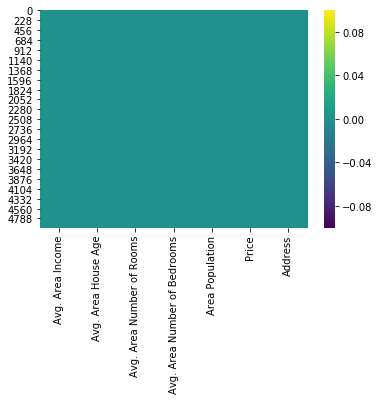

In [12]:
#visualize heatmap
sns.heatmap(dt.isnull(),cmap="viridis")

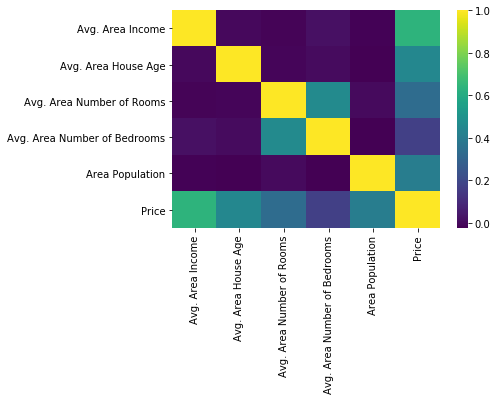

In [18]:
#the correlation heatmap
sns.heatmap(dt.corr(),cmap="viridis",annot=False)

In [20]:
#exploration and study is done
#applying the model
#y value for corresponding Xs
X=dt[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=dt['Price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
#linear regression
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
#fitting of data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
#coefficient and intercept of the straight line
lr.coef_


array([2.15898874e+01, 1.66102501e+05, 1.19895936e+05, 1.90107101e+03,
       1.52315025e+01])

In [30]:
lr.intercept_

-2638142.1104297317

In [47]:
#coefficient for each feature
pd.DataFrame(lr.coef_,X.columns,columns=['lr coef_'])

,lr coef_
Avg. Area Income,21.589887
Avg. Area House Age,166102.501246
Avg. Area Number of Rooms,119895.936402
Avg. Area Number of Bedrooms,1901.071012
Area Population,15.231503


In [48]:
#prediction
k=lr.predict([[60000,6,7,4,35000]])
print("THE PREDICTED PRICE IS",k)

THE PREDICTED PRICE IS [1033844.56736889]


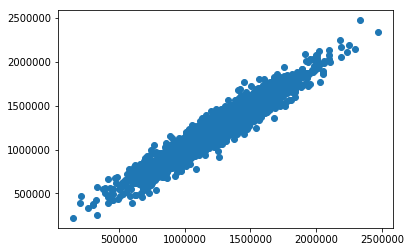

In [49]:
#visualize the prediction 
pt.scatter(y_test,lr.predict(X_test))

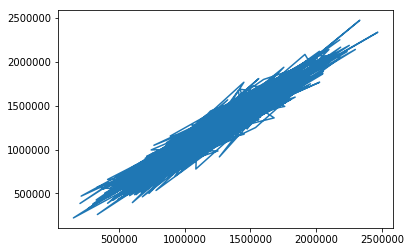

In [50]:
#plotted graph
pt.plot(y_test,lr.predict(X_test))

In [51]:
#evaluation of the model
from sklearn import metrics

In [52]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, lr.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, lr.predict(X_test)))

Mean Absolute Error:  80893.81190770202
Mean Squared Error:  10013679978.582806


In [53]:
#coefficient of determination R-Squared score
from sklearn.metrics import r2_score

In [54]:
print("r-squared score of this prediction model is", r2_score(y_test,lr.predict(X_test)))

r-squared score of this prediction model is 0.9165334724138277
